In [ ]:
# OBSERVATIONS:
# 1. As we knew before, our analysis shows that temperatures rise (get hotter) as we approach the equator. 
# 2. Temperatures also go down as we move towards the northern hemisphere (strong, negative correlation) and rise as we move towards the southern (strong, positive correlation).
# 3. Cloudiness, Humidity, and Wind Speed remain consistent with weak correlation across latitudes.

In [5]:
# Dependencies & Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time 
from scipy.stats import linregress

# Import API Key
weather_api_key = "179a824b84e49bc6a67011fe2add49c8"

# Incorporated citipy to determine city based on latitude and longitude 
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# Generate Cities List 
# Lists for holding lat_lngs and cities 
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to our city list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count 
len(cities)

605

In [7]:
# Perform API Calls 
# Starting URL for Weather Map API Key 
url = "http://api.openweathermap.org/data/2.5/weather?appid=179a824b84e49bc6a67011fe2add49c8&units=imperial"

In [8]:
# Empty Lists 
name_of_city = []
country = []
date = []
lat = []
lng = []
temp = []
humidity = []
cloudiness = []
wind_speed = []

# Starting Points 
record = 1
set = 1

# Print 'Beginning Data Retrieval' Statement 
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

# Create Loop through Cities in List
for i, city in enumerate(cities):
    # Group Cities in Sets of 50
    if (i % 50 == 0 and i >= 50):
        record = 0
        set += 1
    try:
        response = requests.get(f"{url}&q={city}").json()
        name_of_city.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        print_city = response["name"]
        
        print("Processing Record %s of Set %s | %s" % (record, set, print_city))
        
        # Increase counter
        record= record + 1
        # Timer
        time.sleep(1.00)
        
             
    # No record found, Go to Next 
    except:
        print("NO CITY FOUND. NEXT...")
    continue

# Data Retrieval Complete
print("----------------------------------")
print("Data Retrieval Complete           ")
print("----------------------------------")

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | Alta Floresta
Processing Record 2 of Set 1 | Hilo
Processing Record 3 of Set 1 | Lorengau
Processing Record 4 of Set 1 | Kangaatsiaq
Processing Record 5 of Set 1 | Rikitea
Processing Record 6 of Set 1 | East London
NO CITY FOUND. NEXT...
Processing Record 7 of Set 1 | Nanortalik
Processing Record 8 of Set 1 | Hobart
Processing Record 9 of Set 1 | Kangundo
Processing Record 10 of Set 1 | Karera
Processing Record 11 of Set 1 | Palestine
Processing Record 12 of Set 1 | Jamestown
Processing Record 13 of Set 1 | Emba
Processing Record 14 of Set 1 | Ribeira Grande
Processing Record 15 of Set 1 | Ushuaia
Processing Record 16 of Set 1 | Grand Gaube
Processing Record 17 of Set 1 | Guánica
Processing Record 18 of Set 1 | Kapaa
Processing Record 19 of Set 1 | Avera
Processing Record 20 of Set 1 | Okhotsk
Processing Record 21 of Set 1 | Carberry
NO CITY FOUND. NEXT...
Processing Record 22 of Set 1 | Faya
Proces

In [9]:
# Convert Raw Data to Dataframe 
weather_dictionary = {
    "City": name_of_city,
    "Lat": lat, 
    "Lng": lng,
    "Max Temp": temp, 
    "Humidity": humidity,
    "Cloudiness": cloudiness, 
    "Wind Speed": wind_speed, 
    "Country": country,
    "Date": date
}

# Data Frame
weather_frame = pd.DataFrame(weather_dictionary)

# Display Count 
weather_frame.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [10]:
# Save Data Frame to CSV
weather_frame.to_csv("output_csv/weather_frame.csv")
weather_frame.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Alta Floresta,-9.88,-56.09,102.20,15,20,9.17,BR,1597685894
1,Hilo,19.73,-155.09,75.20,83,90,10.29,US,1597685895
2,Lorengau,-2.02,147.27,81.36,80,14,9.46,PG,1597685622
3,Kangaatsiaq,68.31,-53.46,46.60,68,49,1.88,GL,1597685897
4,Rikitea,-23.12,-134.97,71.06,78,7,11.70,PF,1597685898


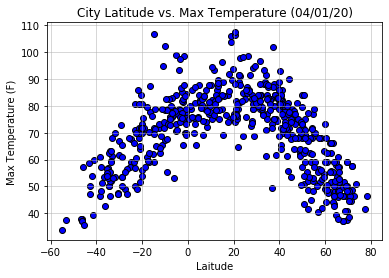

In [99]:
# Latitude vs. Temperature Plot
plt.scatter(weather_frame["Lat"], weather_frame["Max Temp"], facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("PNGs/City Latitude vs Max Temp.png")

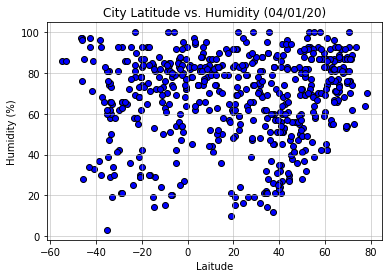

In [13]:
# Latitude vs. Humidity Plot
plt.scatter(weather_frame["Lat"], weather_frame["Humidity"], facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("PNGs/City Latitude vs Humidity.png")

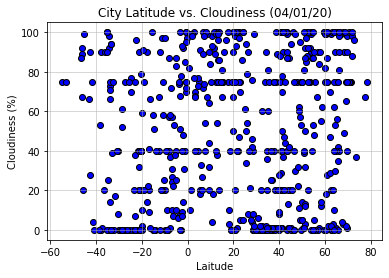

In [21]:
# Latitude vs. Cloudiness Plot
plt.scatter(weather_frame["Lat"], weather_frame["Cloudiness"], facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("PNGs/City Latitude vs Cloudiness.png")

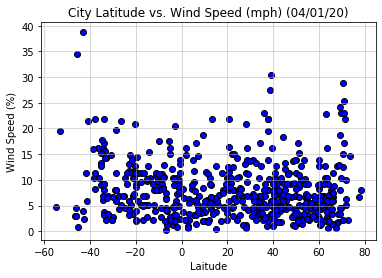

In [20]:
# Latitude vs. Wind Speed
plt.scatter(weather_frame["Lat"], weather_frame["Wind Speed"], facecolor="blue", edgecolor="black")
plt.title("City Latitude vs. Wind Speed (mph) (04/01/20)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-',linewidth=1,alpha = 0.5)
plt.savefig("PNGs/City Latitude vs Wind Speed.png")

In [17]:
# Linear Regression 
# Northern & Southern Data Frames 
northern = weather_frame.loc[weather_frame["Lat"] >= 0]
southern = weather_frame.loc[weather_frame["Lat"] < 0]

In [90]:
# Linear Regression Function for Scatter Plot
import scipy.stats as st
def linear_agression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(line_eq)
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    print(f"The r-squared is : {rvalue**2}")

y = -0.56x + 93.39
The r-squared is : 0.5569947828136053


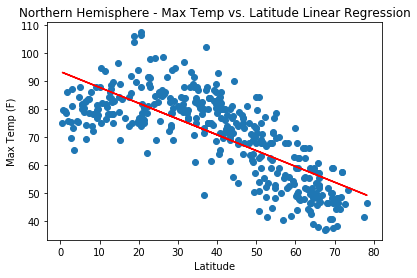

In [91]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(northern["Lat"], northern["Max Temp"])
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("PNGs/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

y = 0.81x + 82.7
The r-squared is : 0.6001678221141559


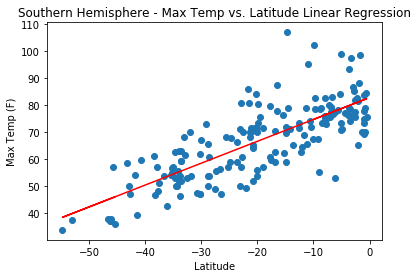

In [92]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
equation = linear_agression(southern["Lat"],southern["Max Temp"])
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("PNGs/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

y = 0.07x + 65.15
The r-squared is : 0.00502009318762442


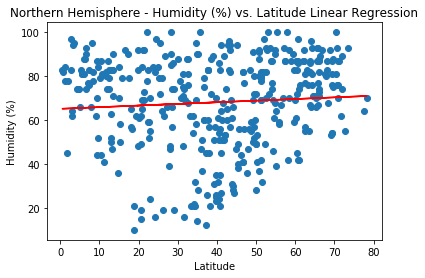

In [93]:
#  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(northern["Lat"],northern["Humidity"])
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("PNGs/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

y = 0.09x + 68.24
The r-squared is : 0.002886250315239327


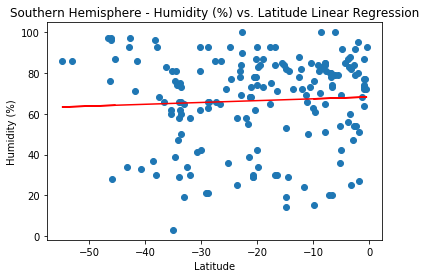

In [94]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
equation = linear_agression(southern["Lat"],southern["Humidity"])
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("PNGs/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

y = -0.01x + 51.94
The r-squared is : 4.170626395014226e-05


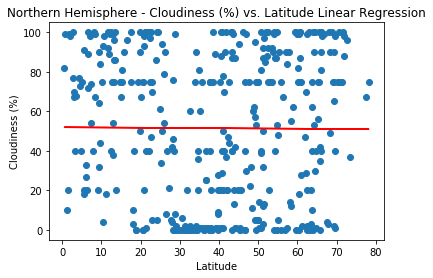

In [95]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(northern["Lat"],northern["Cloudiness"])
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("PNGs/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

y = -0.02x + 41.11
The r-squared is : 3.560852764428525e-05


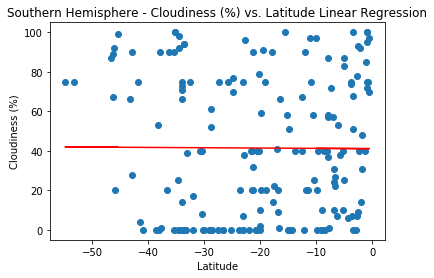

In [96]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
equation = linear_agression(southern["Lat"],southern["Cloudiness"])
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("PNGs/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

y = 0.01x + 6.94
The r-squared is : 0.0021429405723377526


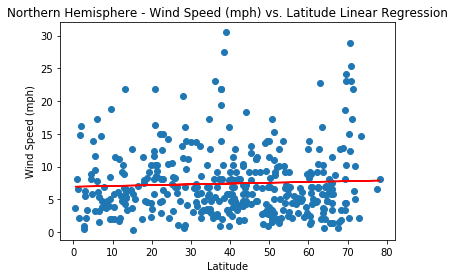

In [97]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression 
equation = linear_agression(northern["Lat"],northern["Wind Speed"])
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("PNGs/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

y = -0.09x + 7.18
The r-squared is : 0.04494207571814211


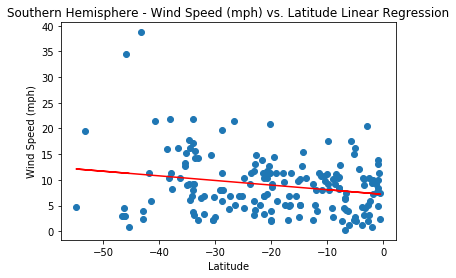

In [98]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
equation = linear_agression(southern["Lat"],southern["Wind Speed"])
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("PNGs/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")